In [1]:
import pickle
import numpy as np
import pysal as ps
from scipy import sparse
from datetime import date
from datetime import timedelta
import pandas as pd
from pandas import TimeGrouper
import matplotlib.pyplot as plt
import config
import os

c:\users\chuan\appdata\local\programs\python\python35\lib\site-packages\pysal\__init__.py:65: VisibleDeprecationWarning: PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysal` 2.0 prelease candidate. The API changes and a guide on how to change imports is provided at https://pysal.org/about
  ), VisibleDeprecationWarning)


In [2]:
def printGrids(periodsAhead, results_grid, results_cluster):
    %matplotlib inline
    plt.close('all')
    fig, ax = plt.subplots(1, 4, figsize=(18,5), sharey=True)
    if config.grid_prediction == 1:
        for j in range(len(results_grid)):
            results = results_grid[j]
            for result in results:
                ax[j].set_ylabel('fractions of crimes avoided')
                ax[j].plot(result, alpha = 0.85)
                ax[j].legend()
    
    if config.cluster_prediction == 1:
        for j in range(len(results_cluster)):
            results = results_cluster[j]
            for result in results:
                if j == 0:
                    ax[j].set_ylabel('fractions of crimes avoided')
                elif j == 1:
                    ax[j].set_xlabel('Available resources')
                    ax[j].set_title('{} week(s) ahead grid results'.format(periodsAhead))
                ax[j].plot(result, alpha = 0.85, marker='.')
                ax[j].legend()
    os.makedirs(os.path.abspath("results/"), exist_ok=True)
    os.makedirs(os.path.abspath("results/plots"), exist_ok=True)
    plt.savefig('results/plots/{}-week-ahead.png'.format(periodsAhead), dpi=300)

In [3]:
def plot(periodsAhead):
    results_grid = None
    results_cluster = None
    print(config.cluster_prediction)
    if config.grid_prediction == 1:
        pkl_file_grid = open('results/grid/grid_{}ahead.pkl'.format(periodsAhead), 'rb')
        results_grid = pickle.load(pkl_file_grid)
    if config.cluster_prediction == 1:
        pkl_file_cluster = open('results/cluster/cluster_{}ahead.pkl'.format(periodsAhead), 'rb')
        results_cluster = pickle.load(pkl_file_cluster)

    printGrids(periodsAhead, results_grid, results_cluster)

1


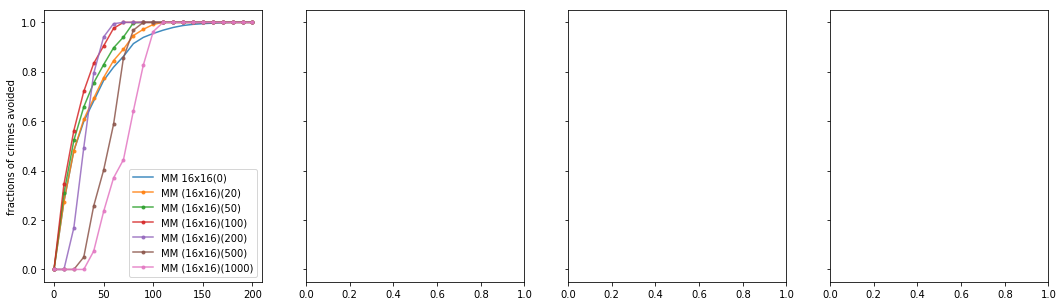

In [4]:
for periodsAhead in config.periodsAhead_list:
    plot(periodsAhead)